In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

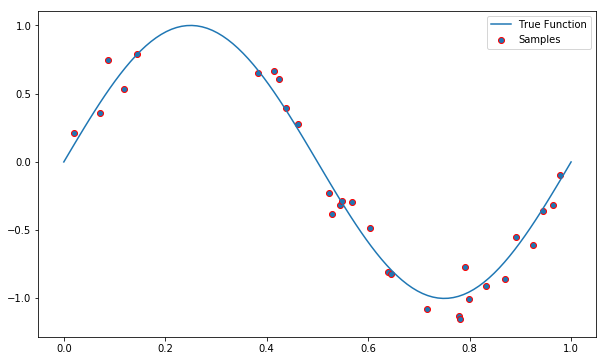

In [2]:
# Define a true function (a sine wave), then sample it at 30 points,
# with a bit of random noise added at each point.
def true_fxn(x):
    """Sine wave function"""
    return np.sin(2 * np.pi * x)

np.random.seed(0)

# Generate random points centered around the true function with a bit of random noise added
num_samples = 30
noise_strength = 0.1
X = np.sort(np.random.rand(num_samples))
y = true_fxn(X) + np.random.randn(num_samples) * noise_strength

plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.scatter(X, y, label="Samples", edgecolor='r')
plt.legend(loc="best")
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

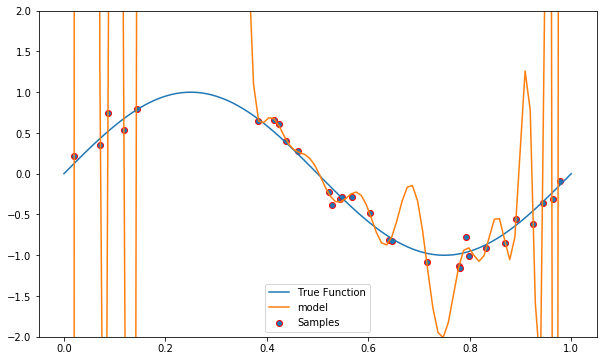

In [4]:
# Produce a high-order model by using Scikit-learn to train a linear model based on polynomial regression
model = make_pipeline(PolynomialFeatures(degree=40), LinearRegression())
model.fit(X[:, np.newaxis], y)

plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X, y, label="Samples", edgecolor='r')
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show() #warning: this is intentionally a terrible model

In [5]:
model.score(X[:, np.newaxis], y) #...yet Scikit-learn's built-in score method says it looks like a great model

0.9956506469361927

In [6]:
from sklearn.model_selection import train_test_split

# Separate our data into training and testing sets before we train the model
X_train, X_test, y_train, y_test = train_test_split(X.reshape(30, 1), y, test_size=0.3)

# Fit the model
model.fit(X_train, y_train)

# These scores will show that the model was over-fit for training data, and falls apart in testing
print("Model performance on traing set: {}".format(model.score(X_train, y_train)))
print("Model performance on testing set: {}".format(model.score(X_test, y_test)))

Model performance on traing set: 0.999999999916048
Model performance on testing set: -676.0466543625573


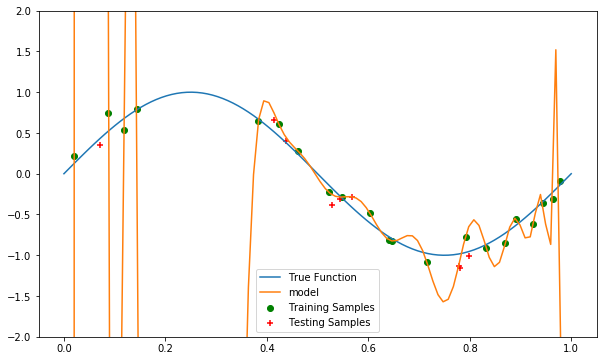

In [7]:
plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X_train, y_train, label="Training Samples", color='g')
plt.scatter(X_test, y_test, label="Testing Samples", color='r', marker="+")
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show()

In [8]:
from sklearn.metrics import r2_score

# R-Squared (Coefficient of Determination)
score = r2_score(X_test, y_test)

In [9]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error
score = mean_squared_error(X_test, y_test)

In [10]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error
score = mean_absolute_error(X_test, y_test)

In [11]:
from sklearn.metrics import accuracy_score

# Accuracy Score - only works when testing binary results, Yes or No
# score = accuracy_score(actual_values, predictions)

In [12]:
from sklearn.metrics import balanced_accuracy_score

# Balanced Accuracy Score
# score = balanced_accuracy_score(actual_values, predictions)

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(actual_values, predictions)
# recall = recall_score(actual_values, predictions)
# f1_score = f1_score(actual_values, predictions)

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# fpr, tpr, thresholds = roc_curve(y, scores)
# roc_auc_score(y_true, y_scores)

In [15]:
from sklearn.metrics import confusion_matrix

actual_values = [2, 0, 2, 2, 0, 1]
predictions = [0, 0, 2, 2, 0, 2]

confusion_matrix(actual_values, predictions)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])